In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Загрузка данных

In [2]:
rating=pd.read_csv("ratings.csv")
movies=pd.read_csv("movies (1).csv")

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
rating.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [5]:
print(movies.shape)
print(rating.shape)


(10329, 3)
(105339, 4)


## Обработка данных

In [6]:
# Объединяем датафреймы по полю movieId
data=movies.merge(rating,on='movieId')

In [7]:
print(data.shape)


(105339, 6)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105339 entries, 0 to 105338
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    105339 non-null  int64  
 1   title      105339 non-null  object 
 2   genres     105339 non-null  object 
 3   userId     105339 non-null  int64  
 4   rating     105339 non-null  float64
 5   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.6+ MB


In [9]:
data.describe()

,movieId,userId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,13381.312477,364.924539,3.516850,1.130424e+09
std,26170.456869,197.486905,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,1073.000000,192.000000,3.000000,9.711008e+08
50%,2497.000000,383.000000,3.500000,1.115154e+09
75%,5991.000000,557.000000,4.000000,1.275496e+09
max,149532.000000,668.000000,5.000000,1.452405e+09


In [10]:
import re  

data["title"] = data["title"].apply(lambda x: re.sub("[\W_]+", " ", x).strip())
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story 1995,Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story 1995,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story 1995,Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story 1995,Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story 1995,Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286


In [11]:
#Удаляем все строки с пропущенными значениями
df=data.copy()
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

In [12]:
df = df.drop(['movieId', 'timestamp'], axis=1)



In [13]:
#df.to_csv('Fazafilms.csv', index=False) 

In [14]:
df

,title,genres,userId,rating
0,Toy Story 1995,Adventure|Animation|Children|Comedy|Fantasy,2,5.0
1,Toy Story 1995,Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,Toy Story 1995,Adventure|Animation|Children|Comedy|Fantasy,8,5.0
3,Toy Story 1995,Adventure|Animation|Children|Comedy|Fantasy,11,4.0
4,Toy Story 1995,Adventure|Animation|Children|Comedy|Fantasy,14,4.0
...,...,...,...,...
105334,A Very Murray Christmas 2015,Comedy,475,3.0
105335,The Big Short 2015,Drama,458,4.0
105336,The Big Short 2015,Drama,576,4.5
105337,The Big Short 2015,Drama,668,4.5


In [52]:
def PrintGenres():
    unique_genres = set() 
    for genres in df['genres']:
        genres_list = genres.split('|')  
        for genre in genres_list:
            unique_genres.add(genre) 
    return unique_genres
    
unique_genres = PrintGenres()

unique_genres

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

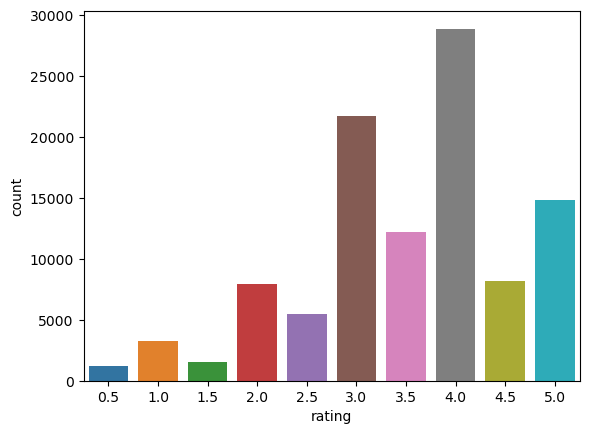

In [15]:
sns.countplot(data=df , x='rating')
plt.show()

**Система рекомендаций на основе взвешенных рейтингов**

Взвешенные: рекомендациям, полученным разными методами, присваивается различный вес – то есть, некоторые рекомендации считаются более предпочтительными, нежели другие.

In [16]:
#Находим средний рейтинг фильмов
avg_ratings = df.groupby('title')['rating'].mean().reset_index().rename(columns={'rating': 'avg_rating'})

avg=pd.DataFrame(avg_ratings).sort_values('avg_rating',ascending=False)

In [17]:
avg.head(10)

,title,avg_rating
4384,Hunchback of Notre Dame The Notre Dame de Pari...,5.0
5392,Limelight 1952,5.0
2707,Dream Man 1995,5.0
8158,Sherlock Holmes and the Voice of Terror 1942,5.0
5263,Lawless Heart The 2003,5.0
4076,Heima 2007,5.0
878,Beast of War The Beast The 1988,5.0
3448,From One Second to the Next 2013,5.0
5478,Long Gray Line The 1955,5.0
5939,Memories Memorîzu 1995,5.0


In [18]:
#Высчитываем количесто отзывов на 1 фильм
cnt_ratings = df.groupby('title')['rating'].count().reset_index().rename(columns={'rating': 'count_rating'})

cnt=pd.DataFrame(cnt_ratings).sort_values('count_rating',ascending=False)
popularite=avg.merge(cnt,on='title')

In [19]:
popularite.head(10)

,title,avg_rating,count_rating
0,Hunchback of Notre Dame The Notre Dame de Pari...,5.0,1
1,Limelight 1952,5.0,1
2,Dream Man 1995,5.0,1
3,Sherlock Holmes and the Voice of Terror 1942,5.0,1
4,Lawless Heart The 2003,5.0,1
5,Heima 2007,5.0,1
6,Beast of War The Beast The 1988,5.0,1
7,From One Second to the Next 2013,5.0,1
8,Long Gray Line The 1955,5.0,1
9,Memories Memorîzu 1995,5.0,2


In [20]:
popularite[popularite['title']=='Frozen 2010']

,title,avg_rating,count_rating
3128,Frozen 2010,3.625,4


In [21]:
#вычисляем взвешенные оценки
v=popularite["count_rating"]
R=popularite["avg_rating"]
m=v.quantile(0.90)
c=R.mean()
popularite['w_score']=((v*R) + (m*c)) / (v+m)

In [22]:
popularite["count_rating"].describe()

count    10323.000000
mean        10.204301
std         22.834557
min          1.000000
25%          1.000000
50%          3.000000
75%          8.000000
max        325.000000
Name: count_rating, dtype: float64

In [23]:
pop_sort=popularite.sort_values('w_score',ascending=False)

In [24]:
pop_sort

,title,avg_rating,count_rating,w_score
412,Shawshank Redemption The 1994,4.454545,308,4.358650
434,Godfather The 1972,4.392857,210,4.263534
482,Usual Suspects The 1995,4.328947,228,4.215141
501,Schindler s List 1993,4.296371,248,4.193885
516,Matrix The 1999,4.264368,261,4.169338
...,...,...,...,...
9133,Anaconda 1997,2.041667,36,2.507058
9711,Super Mario Bros 1993,1.807692,26,2.479031
9087,Wild Wild West 1999,2.164179,67,2.439463
9719,Speed 2 Cruise Control 1997,1.774194,31,2.400546


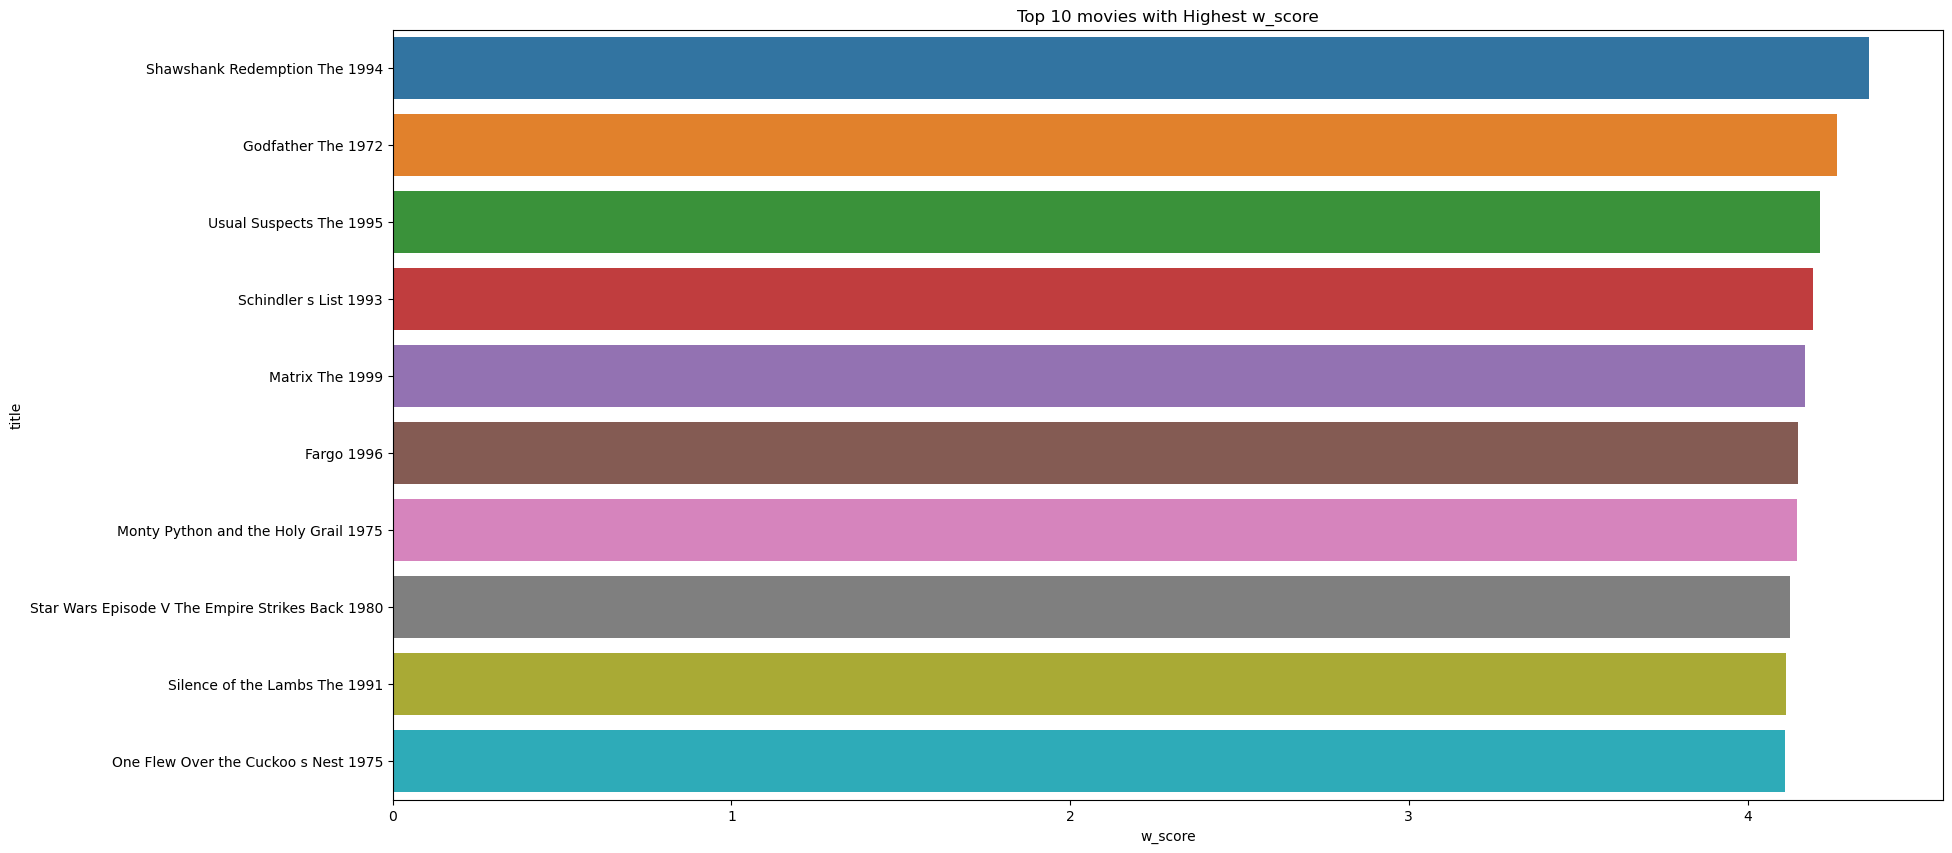

In [25]:
top_10_movies = pop_sort.head(10)

plt.figure(figsize=(20, 10))
sns.barplot(x='w_score', y='title', data=top_10_movies)
plt.xlabel('w_score')
plt.ylabel('title')
plt.title('Top 10 movies with Highest w_score')
plt.show()

**Cистема рекомендаций по коллаборативной фильтрации (с использованием корреляции)**

In [26]:
new_df=df[df['userId'].map(df['userId'].value_counts()) > 200]  

In [27]:
new_df

,title,genres,userId,rating
7,Toy Story 1995,Adventure|Animation|Children|Comedy|Fantasy,29,4.0
10,Toy Story 1995,Adventure|Animation|Children|Comedy|Fantasy,32,4.0
11,Toy Story 1995,Adventure|Animation|Children|Comedy|Fantasy,38,5.0
12,Toy Story 1995,Adventure|Animation|Children|Comedy|Fantasy,44,1.5
16,Toy Story 1995,Adventure|Animation|Children|Comedy|Fantasy,54,3.0
...,...,...,...,...
105334,A Very Murray Christmas 2015,Comedy,475,3.0
105335,The Big Short 2015,Drama,458,4.0
105336,The Big Short 2015,Drama,576,4.5
105337,The Big Short 2015,Drama,668,4.5


In [28]:
users_pivot=new_df.pivot_table(index=["userId"],columns=["title"],values="rating")
users_pivot.fillna(0,inplace=True)

In [29]:
users_pivot.head()

title,10 000 BC 2008,10 1979,10 Items or Less 2006,10 Things I Hate About You 1999,10 to Midnight 1983,100 Girls 2000,101 Dalmatians 1996,101 Dalmatians One Hundred and One Dalmatians 1961,101 Reykjavik 101 Reykjavík 2000,102 Dalmatians 2000,...,Zulu 1964,a k a Tommy Chong 2005,batteries not included 1987,burbs The 1989,eXistenZ 1999,loudQUIETloud A Film About the Pixies 2006,night Mother 1986,xXx 2002,xXx State of the Union 2005,À nous la liberté Freedom for Us 1931
userId,,,,,,,,,,,,,,,,,,,,,
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
#Метод находит книги, которые имеют схожие оценки с определенной книгой
def same_books(book):
    users_vote_book=users_pivot[book]
    similar_with=users_pivot.corrwith(users_vote_book)
    similar_with = pd.DataFrame(similar_with, columns=['correlation'])
    print(similar_with)
    df=similar_with.sort_values('correlation',ascending=False).head(10)
    print(df)
    df_sort=df[df['correlation']>0.8]
    return df_sort

In [31]:
same_books('Frozen 2010')

                                            correlation
title                                                  
10 000 BC 2008                                -0.023560
10 1979                                        0.111924
10 Items or Less 2006                          0.108985
10 Things I Hate About You 1999                0.007903
10 to Midnight 1983                           -0.014522
...                                                 ...
loudQUIETloud A Film About the Pixies 2006    -0.014522
night Mother 1986                             -0.014522
xXx 2002                                       0.427145
xXx State of the Union 2005                    0.278279
À nous la liberté Freedom for Us 1931          0.183775

[9978 rows x 1 columns]
                                              correlation
title                                                    
Frozen 2010                                      1.000000
Ip Man 2 2010                                    0.834174
Ip Man 2008    

,correlation
title,
Frozen 2010,1.000000
Ip Man 2 2010,0.834174
Ip Man 2008,0.833508
Rite The 2011,0.802906


**Коллаборативная фильтрация: модель NearestNeighbours из scikit-learn для вашей системы рекомендаций**

Коллаборативная фильтрация — популярный метод построения систем рекомендаций, основанных на предпочтениях и поведении пользователей. 
Методы коллаборативной фильтрации дают рекомендации, используя шаблоны и отношения между пользователями и объектами.

Коллаборативная фильтрация на основе пользователей. Этот подход идентифицирует пользователей, похожих на целевого пользователя, на основе их предпочтений, а затем рекомендует элементы, которые понравились этим похожим пользователям. Предполагается, что если пользователи A и B имели схожие предпочтения в прошлом, то то, что нравится одному из них, может понравиться и другому.

In [32]:
df.head()

,title,genres,userId,rating
0,Toy Story 1995,Adventure|Animation|Children|Comedy|Fantasy,2,5.0
1,Toy Story 1995,Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,Toy Story 1995,Adventure|Animation|Children|Comedy|Fantasy,8,5.0
3,Toy Story 1995,Adventure|Animation|Children|Comedy|Fantasy,11,4.0
4,Toy Story 1995,Adventure|Animation|Children|Comedy|Fantasy,14,4.0


In [33]:
users_pivot

title,10 000 BC 2008,10 1979,10 Items or Less 2006,10 Things I Hate About You 1999,10 to Midnight 1983,100 Girls 2000,101 Dalmatians 1996,101 Dalmatians One Hundred and One Dalmatians 1961,101 Reykjavik 101 Reykjavík 2000,102 Dalmatians 2000,...,Zulu 1964,a k a Tommy Chong 2005,batteries not included 1987,burbs The 1989,eXistenZ 1999,loudQUIETloud A Film About the Pixies 2006,night Mother 1986,xXx 2002,xXx State of the Union 2005,À nous la liberté Freedom for Us 1931
userId,,,,,,,,,,,,,,,,,,,,,
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
659,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
from scipy.sparse import csr_matrix
import pandas as pd
from sklearn.neighbors import NearestNeighbors

book_df_matrix = csr_matrix(users_pivot.values)

def find_similar_books(book_name, num_neighbors=10):
    model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
    model_knn.fit(book_df_matrix.T)  
    
    book_index = users_pivot.columns.get_loc(book_name)
    
    distances, indices = model_knn.kneighbors(book_df_matrix.T[book_index], n_neighbors=num_neighbors+1)
    
    similar_indices = indices[0][1:]
    
    list_similar_books = [users_pivot.columns[idx] for idx in similar_indices]
    similar_books = pd.DataFrame({"Similar books to": list_similar_books})
    return similar_books




In [35]:
# Example usage
input_book = "Toy Story 1995"  
find_similar_books(input_book)

,Similar books to
0,Raiders of the Lost Ark Indiana Jones and the ...
1,Jurassic Park 1993
2,Star Wars Episode VI Return of the Jedi 1983
3,Star Wars Episode V The Empire Strikes Back 1980
4,Star Wars Episode IV A New Hope 1977
5,Back to the Future 1985
6,Pulp Fiction 1994
7,Terminator 2 Judgment Day 1991
8,Sixth Sense The 1999
9,E T the Extra Terrestrial 1982


Попробую проверить метод, при вводе фильма Jurassic Park (1993) по идее должно отобразиться Toy Story (1995)

In [36]:
# Example usage
input_book = "Jurassic Park 1993"  
find_similar_books(input_book)

,Similar books to
0,Raiders of the Lost Ark Indiana Jones and the ...
1,Back to the Future 1985
2,Star Wars Episode IV A New Hope 1977
3,Terminator 2 Judgment Day 1991
4,Men in Black a k a MIB 1997
5,Speed 1994
6,Star Wars Episode V The Empire Strikes Back 1980
7,Toy Story 1995
8,Terminator The 1984
9,Fugitive The 1993


Как видим в списке есть Toy Story (1995)

In [37]:
#Метод используется для нахождения и вывода списка любимых фильмов 
def find_favorite_books(User_id, num_books=10):
    model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
    model_knn.fit(book_df_matrix)
    
    user_index = users_pivot.index.get_loc(User_id)
    
    distances, indices = model_knn.kneighbors(book_df_matrix[user_index], n_neighbors=num_books+1)
    favorite_indices = indices[0][1:]
    
    list_favorite_books = [users_pivot.columns[idx] for idx in favorite_indices]
    favorite_books=pd.DataFrame({"favorite books ":list_favorite_books})
    return favorite_books



In [38]:
# Example usage
User_id= 22  
find_favorite_books(User_id)

,favorite books
0,20 Dates 1998
1,12 01 1993
2,2 Guns 2013
3,1776 1972
4,3 Women Three Women 1977
5,127 Hours 2010
6,47 Samurai Chûshingura Loyal 47 Ronin The 1962
7,101 Reykjavik 101 Reykjavík 2000
8,28 Up 1985
9,4 44 Last Day on Earth 2011


**Косинусное сходство**

In [39]:
users_pivot.head()

title,10 000 BC 2008,10 1979,10 Items or Less 2006,10 Things I Hate About You 1999,10 to Midnight 1983,100 Girls 2000,101 Dalmatians 1996,101 Dalmatians One Hundred and One Dalmatians 1961,101 Reykjavik 101 Reykjavík 2000,102 Dalmatians 2000,...,Zulu 1964,a k a Tommy Chong 2005,batteries not included 1987,burbs The 1989,eXistenZ 1999,loudQUIETloud A Film About the Pixies 2006,night Mother 1986,xXx 2002,xXx State of the Union 2005,À nous la liberté Freedom for Us 1931
userId,,,,,,,,,,,,,,,,,,,,,
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
from sklearn.metrics.pairwise import cosine_similarity 

In [41]:
similarity_score = cosine_similarity(users_pivot.T)

In [42]:
similarity_score.shape

(9978, 9978)

In [43]:
similarity_score

array([[1.        , 0.        , 0.        , ..., 0.19223226, 0.42966892,
        0.        ],
       [0.        , 1.        , 0.44280744, ..., 0.39167999, 0.        ,
        0.68041382],
       [0.        , 0.44280744, 1.        , ..., 0.30258403, 0.146119  ,
        0.65079137],
       ...,
       [0.19223226, 0.39167999, 0.30258403, ..., 1.        , 0.39200433,
        0.30996521],
       [0.42966892, 0.        , 0.146119  , ..., 0.39200433, 1.        ,
        0.        ],
       [0.        , 0.68041382, 0.65079137, ..., 0.30996521, 0.        ,
        1.        ]])

In [44]:
users_pivot2 = users_pivot.T

In [45]:
users_pivot2

userId,22,24,29,32,38,44,54,60,62,63,...,607,615,622,627,628,650,659,665,666,668
title,,,,,,,,,,,,,,,,,,,,,
10 000 BC 2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 1979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5
10 Items or Less 2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
10 Things I Hate About You 1999,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,1.5,...,3.0,0.0,0.0,3.5,0.0,5.0,2.5,0.0,4.0,2.0
10 to Midnight 1983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
loudQUIETloud A Film About the Pixies 2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
night Mother 1986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xXx 2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.5,...,0.0,0.0,4.0,2.5,0.0,0.0,0.0,0.0,0.0,3.5


In [46]:
import numpy as np
from difflib import get_close_matches

movies['title'] = movies['title'].apply(lambda x: re.sub("[\W_]+", " ", x).strip())
users_pivot2.index = users_pivot2.index.str.replace(r"[\W_]+", " ", regex=True).str.strip()

def recommend(movie_name):
    try:
        close_match = get_close_matches(movie_name, users_pivot2.index, n=1, cutoff=0.8)
        if not close_match:
            return f"Фильм '{movie_name}' не найден в данных."

        matched_name = close_match[0]
        index = np.where(users_pivot2.index == matched_name)[0][0]
        
        similar_movies = sorted(list(enumerate(similarity_score[index])), key=lambda x: x[1], reverse=True)[1:11]
        recommendations = []

        for i in similar_movies:
            item = []
            
            temp_df = movies[movies['title'] == users_pivot2.index[i[0]]]
            
            if not temp_df.empty:
                item.append(temp_df['title'].values[0])
                item.append(temp_df['genres'].values[0])
                
                movie_ratings = users_pivot2.loc[users_pivot2.index[i[0]]]
                average_rating = movie_ratings[movie_ratings > 0].mean()
                
                item.append(average_rating if not np.isnan(average_rating) else "Нет данных")
                recommendations.append(item)
        
        return recommendations

    except IndexError:
        return f"Фильм '{movie_name}' не найден в данных."




In [47]:
recommend("xXx 2002")


[['Salt 2010', 'Action|Thriller', 3.1153846153846154],
 ['Mechanic The 2011', 'Action|Drama|Thriller', 3.3125],
 ['Fast and the Furious The 2001',
  'Action|Crime|Thriller',
  2.8260869565217392],
 ['Green Zone 2010', 'Action|Drama|Thriller|War', 3.2142857142857144],
 ['2 Guns 2013', 'Action|Comedy|Crime', 3.0],
 ['2 Fast 2 Furious Fast and the Furious 2 The 2003',
  'Action|Crime|Thriller',
  2.5416666666666665],
 ['I Am Number Four 2011', 'Action|Sci-Fi|Thriller|IMAX', 2.9],
 ['Parker 2013', 'Crime|Thriller', 3.1],
 ['Chronicles of Riddick The 2004',
  'Action|Sci-Fi|Thriller',
  3.282608695652174],
 ['Book of Eli The 2010', 'Action|Adventure|Drama', 3.1666666666666665]]

In [48]:
recommend("10 Items or Less 2006")

[['Interview 2007', 'Drama', 3.25],
 ['Redbelt 2008', 'Action|Drama', 3.25],
 ['Bottle Shock 2008', 'Drama', 3.25],
 ['W 2008', 'Drama', 3.25],
 ['Killshot 2008', 'Action|Crime|Drama|Thriller', 2.75],
 ['Women The 2008', 'Comedy|Drama', 2.0],
 ['Nothing But the Truth 2008', 'Drama|Thriller', 2.5],
 ['Fair Game 2010', 'Drama|Thriller', 3.5],
 ['Messenger The 2009', 'Drama|Romance|War', 4.0],
 ['Confessions of a Shopaholic 2009', 'Comedy|Romance', 2.0]]